# random sample imputation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', usecols=['Age'])

In [3]:
data.Age.isnull().sum()

177

In [4]:
data.head()

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [5]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [6]:
median = data.Age.median()

In [7]:
impute_nan(data, 'Age', median)
data

,Age,Age_median,Age_random
0,22.0,22.0,22.0
1,38.0,38.0,38.0
2,26.0,26.0,26.0
3,35.0,35.0,35.0
4,35.0,35.0,35.0
...,...,...,...
886,27.0,27.0,27.0
887,19.0,19.0,19.0
888,NaN,28.0,15.0
889,26.0,26.0,26.0


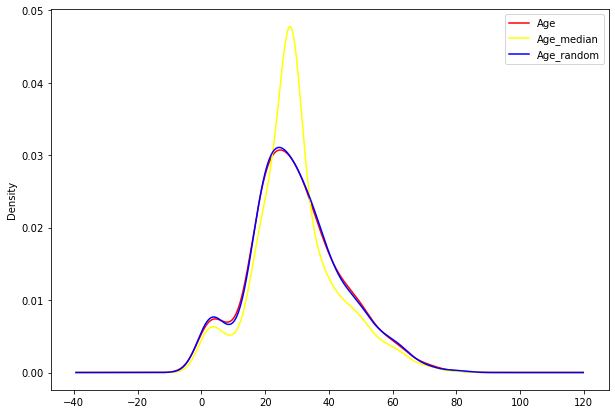

In [9]:
figure = plt.figure(figsize=(10,7))
ax = figure.add_subplot(111)
data.Age.plot(kind='kde', color='red', ax=ax)
data.Age_median.plot(kind='kde', color='yellow', ax=ax)
data.Age_random.plot(kind='kde', color='blue', ax=ax)
h, l = ax.get_legend_handles_labels()
ax.legend(h,l)
plt.show()

# Capturing NAN values with a new feature

In [10]:
data['new_feature'] = np.where(data.Age.isnull(), 1, 0)

In [11]:
data

,Age,Age_median,Age_random,new_feature
0,22.0,22.0,22.0,0
1,38.0,38.0,38.0,0
2,26.0,26.0,26.0,0
3,35.0,35.0,35.0,0
4,35.0,35.0,35.0,0
...,...,...,...,...
886,27.0,27.0,27.0,0
887,19.0,19.0,19.0,0
888,NaN,28.0,15.0,1
889,26.0,26.0,26.0,0


# End of Distribution imputation

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

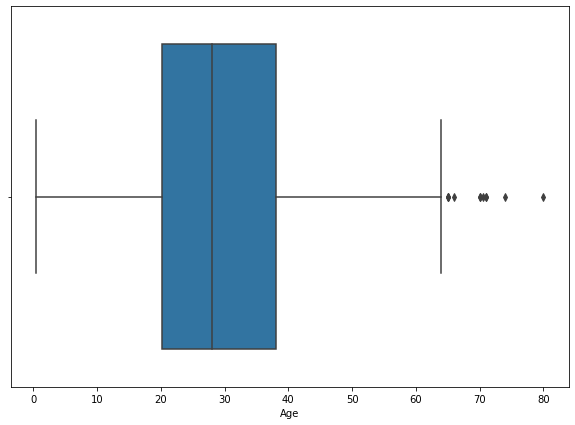

In [13]:
figure = plt.figure(figsize=(10,7)) 
sns.boxplot(data.Age)

In [14]:
std = data.Age.std()

In [15]:
std

14.526497332334044

In [27]:
age_end_of_distribution = data.Age.mean()+3*std
age_end_of_distribution

73.27860964406095

In [25]:
data.drop('age_end_of_distribution', axis=1, inplace=True)

In [28]:
def end_imputation(data, feature, value):
    data[feature+'extreme_value']= data[feature].fillna(value)
    return data

In [29]:
end_imputation(data, 'Age', age_end_of_distribution)

,Age,Age_median,Age_random,new_feature,Ageextreme_value
0,22.0,22.0,22.0,0,22.00000
1,38.0,38.0,38.0,0,38.00000
2,26.0,26.0,26.0,0,26.00000
3,35.0,35.0,35.0,0,35.00000
4,35.0,35.0,35.0,0,35.00000
...,...,...,...,...,...
886,27.0,27.0,27.0,0,27.00000
887,19.0,19.0,19.0,0,19.00000
888,NaN,28.0,15.0,1,73.27861
889,26.0,26.0,26.0,0,26.00000


C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ageextreme_value'>

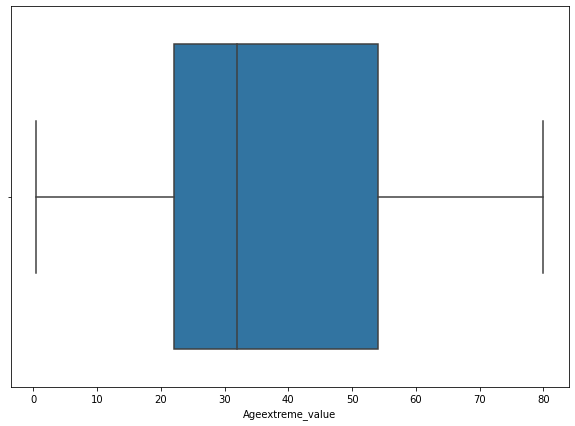

In [34]:
plt.figure(figsize=(10,7))
sns.boxplot(data.Ageextreme_value)

<Figure size 720x504 with 0 Axes>

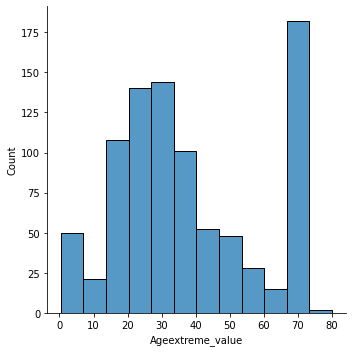

In [35]:
plt.figure(figsize=(10,7))
sns.displot(data.Ageextreme_value)

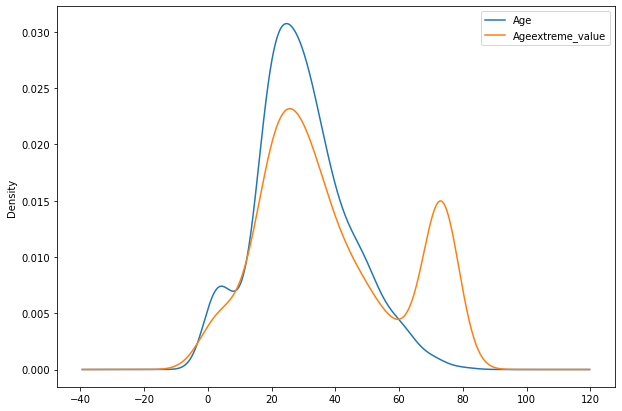

In [37]:
figure = plt.figure(figsize=(10,7))
ax = figure.add_subplot(1,1,1)
data.Age.plot(kind='kde', ax=ax)
data.Ageextreme_value.plot(kind='kde', ax=ax)
h, l = ax.get_legend_handles_labels()
ax.legend(h,l)
plt.show()

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

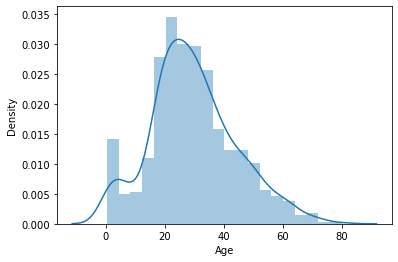

In [38]:
sns.distplot(data.Age)